In [1]:
import calendar
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

Next we extract the fields we care about from the dataset. The 'Count' field contains the number of individuals seen. The 'Stage' field contains the lifestage of the butterflies seen (egg, caterpillar, pupa, adult). Both of these are often not specified in the data.

In [2]:
names = ['Month', 'Day', 'Year', 'Common Name', 'Binomial Name', 'Count', 'Stage', 'Address', 'Grid']
usecols = [0, 1, 2, 3, 4, 6, 7, 8, 14]
butterflies = pd.read_csv('data/butterflies.txt', sep='|', header=None, names=names, usecols=usecols)

Then we combine the 'Month', 'Day' and 'Year' fields into a date field. We need to ignore a small number of invalid years. These appear to be a parsing problem where a single observation is split into two lines in the dataset.

In [3]:
# Ignore rows with invalid years
butterflies = butterflies[pd.to_numeric(butterflies['Year'], errors='coerce').isna() == False]

# Convert months
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
          'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
butterflies['Month Name'] = butterflies['Month']
butterflies['Month'] = butterflies['Month'].apply(lambda x: months[x])

# Create Date column
butterflies['Date'] = pd.to_datetime(butterflies[['Year', 'Month', 'Day']])

Let's see how many unique species are present.

In [4]:
butterflies['Common Name'].unique()

array(["Milbert's Tortoiseshell", 'Monarch', 'Black Swallowtail',
       'Eastern Tailed Blue', 'Eastern Comma', 'Viceroy',
       'Wild Indigo Duskywing', 'White Admiral', 'Northern Crescent',
       'Cabbage White', 'Clouded Sulphur', 'Common Ringlet',
       'Least Skipper', 'Red Admiral', 'Common Wood-Nymph',
       'Eastern Giant Swallowtail', 'Mourning Cloak', 'Crossline Skipper',
       'Northern Broken-Dash', 'Delaware Skipper', 'Mulberry Wing',
       'Broad-winged Skipper', 'Dion Skipper', 'Dun Skipper',
       'Mustard White', 'Great Spangled Fritillary', "Peck's Skipper",
       'Two-spotted Skipper', 'Question Mark', 'Eyed Brown',
       'Northern Pearly-Eye', 'Little Glassywing', 'Northern Cloudywing',
       'European Skipper', 'Hobomok Skipper', 'Bronze Copper',
       'Indian Skipper', 'Tawny-edged Skipper', 'Long Dash Skipper',
       'Canadian Tiger Swallowtail', 'Silvery Blue',
       'Silver-bordered Fritillary', 'Tawny Crescent',
       'Little Wood-Satyr', 'Balti

The dataset includes one subspecies, Northern Mourning Cloak. We'll combine it with the other Mourning Cloak observations. Chances are, all Mourning Cloaks spotted in Ottawa are actually of the northern form.

In [5]:
butterflies['Common Name'] = butterflies['Common Name'].replace('Northern Mourning Cloak', 'Mourning Cloak')

The dataset contains observations going back to the the 19th century. Let's just look at the last 10 years.

In [6]:
recent = butterflies[butterflies['Date'] > '2009-01-01']
recent

,Month,Day,Year,Common Name,Binomial Name,Count,Stage,Address,Grid,Month Name,Date
0,10,14,2018,Milbert's Tortoiseshell,Aglais milberti,NaN,NaN,"Eagleson Rd, Ottawa",18VR31,Oct,2018-10-14
1,10,10,2018,Monarch,Danaus plexippus,NaN,NaN,"Eagleson Rd, Ottawa",18VR31,Oct,2018-10-10
2,10,5,2018,Black Swallowtail,Papilio polyxenes,NaN,NaN,"Eagleson Rd, Ottawa",18VR31,Oct,2018-10-05
3,9,18,2018,Eastern Tailed Blue,Cupido comyntas,NaN,NaN,"Eagleson Rd, Ottawa",18VR31,Sep,2018-09-18
4,9,18,2018,Eastern Comma,Polygonia comma,NaN,NaN,"Eagleson Rd, Ottawa",18VR31,Sep,2018-09-18
5,9,9,2018,Viceroy,Limenitis archippus,NaN,NaN,"Bridlewood - Emerald Meadows, Ottawa",18VR31,Sep,2018-09-09
6,9,7,2018,Wild Indigo Duskywing,Erynnis baptisiae,NaN,NaN,"Eagleson Rd, Ottawa",18VR31,Sep,2018-09-07
7,9,6,2018,White Admiral,Limenitis arthemis arthemis,NaN,NaN,"Stony Swamp Conservation Area, Ottawa",18VR31,Sep,2018-09-06
8,9,4,2018,Viceroy,Limenitis archippus,NaN,NaN,"Eagleson Road, Goulbourn, Ottawa",18VR31,Sep,2018-09-04
9,9,3,2018,Wild Indigo Duskywing,Erynnis baptisiae,3,NaN,Fallowfield,18VR31,Sep,2018-09-03


In [9]:
recent.loc[:,'Extended Month'] = recent.loc[:,'Month'] * 2
recent.loc[recent['Date'].dt.day >= 15, 'Extended Month'] += 1

In [10]:
min(recent['Extended Month']), max(recent['Extended Month'])

(6, 23)

In [11]:
targets = recent.groupby('Common Name').count().sort_values(by='Date', ascending=False)[:50]
targets['Count']

Common Name
Cabbage White                 1225
Clouded Sulphur               1019
Northern Azure                 789
Common Ringlet                 759
Monarch                        641
Mourning Cloak                 641
Red Admiral                    495
Silvery Blue                   436
Eastern Tailed Blue            387
European Skipper               341
Black Swallowtail              333
Viceroy                        298
Northern Crescent              299
Canadian Tiger Swallowtail     278
Little Wood-Satyr              278
White Admiral                  255
Eastern Comma                  239
Northern Pearly-Eye            222
Painted Lady                   200
Hobomok Skipper                198
Great Spangled Fritillary      177
Common Wood-Nymph              173
American Lady                  170
Question Mark                  169
Henry's Elfin                  168
Eastern Giant Swallowtail      147
Pearl Crescent                 140
Juvenal's Duskywing            132
Dun Skip

Another reason to target the top 50 is that even at that level, the less common butterflies are not seen every year. For instance, the Harvester was seen only once in 2014 and not at all in 2018.

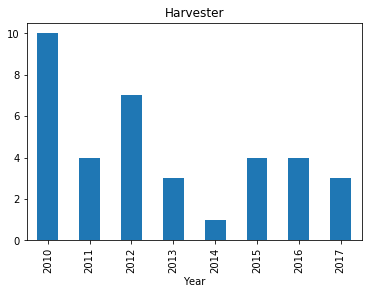

In [12]:
ax = recent[recent['Common Name'] == 'Harvester'].groupby('Year').count()['Count'].plot.bar()
ax.set_title('Harvester')
None

With this list, we can plot the number of observations for each species by month, giving the phenology of when we can expect to see adults. Although some of the observations are for other life stages, the vast majority are for adults, so this should not skew the results.

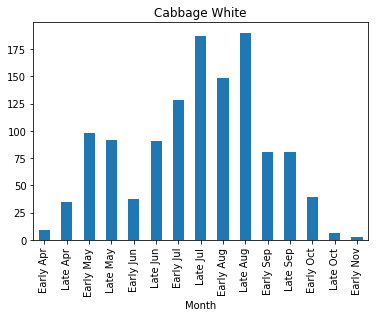

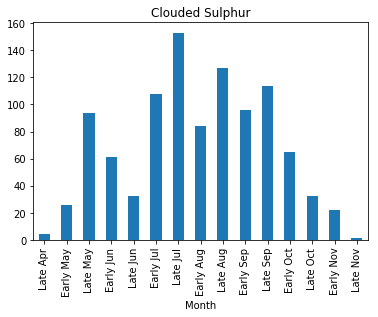

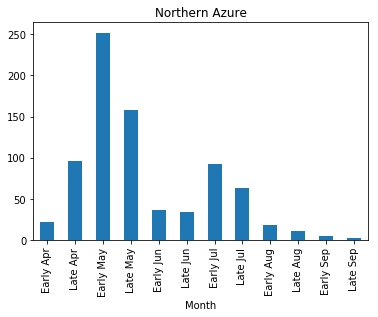

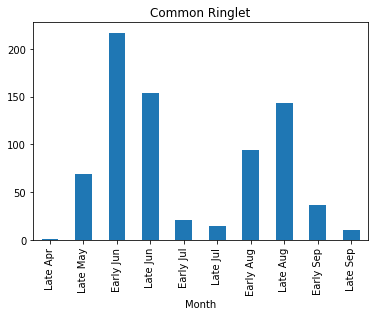

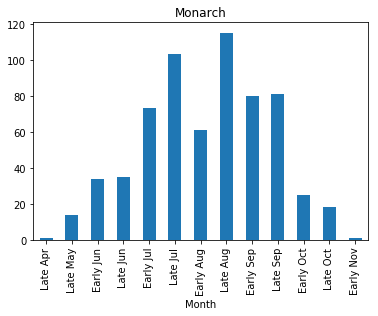

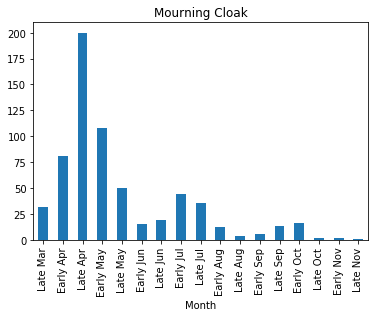

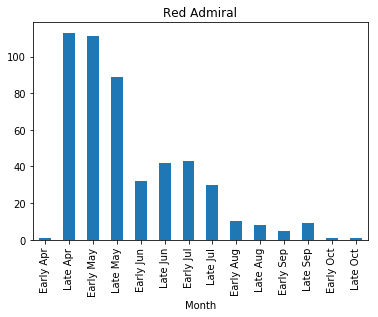

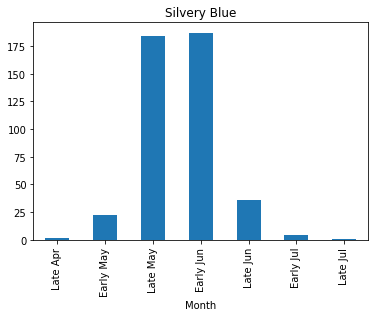

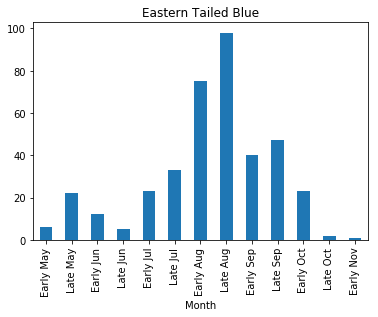

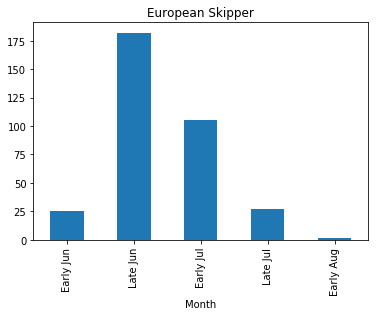

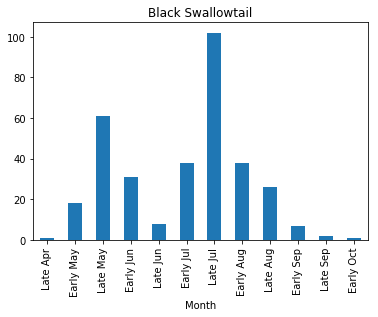

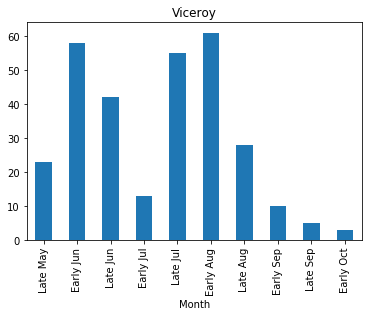

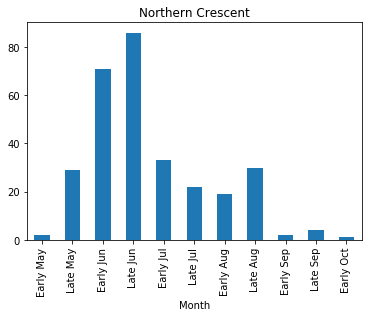

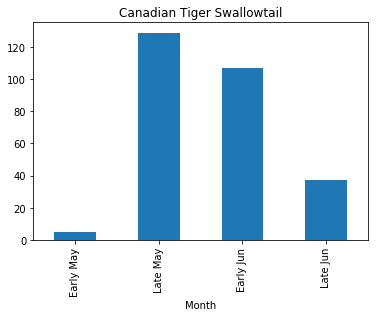

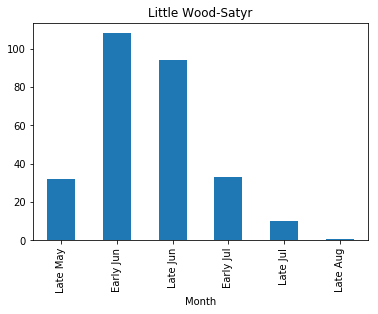

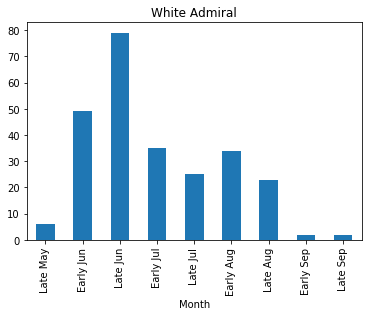

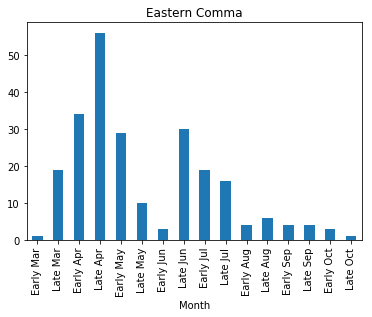

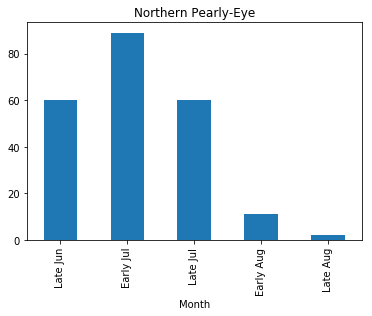

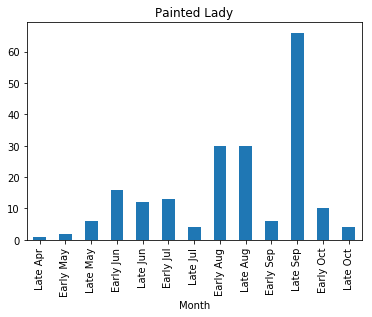

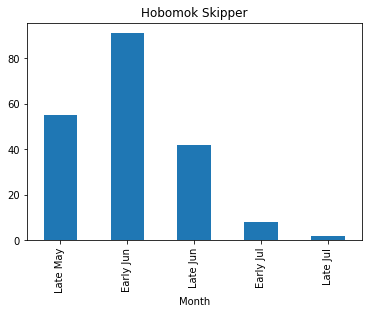

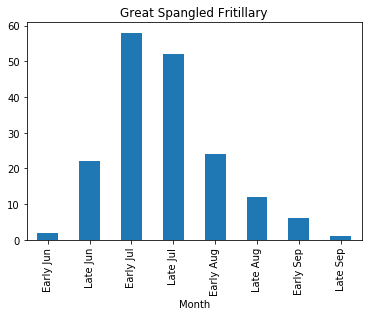

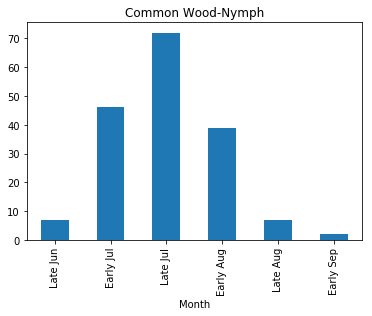

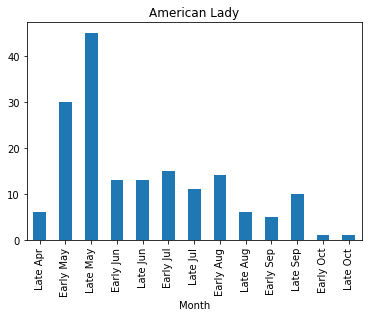

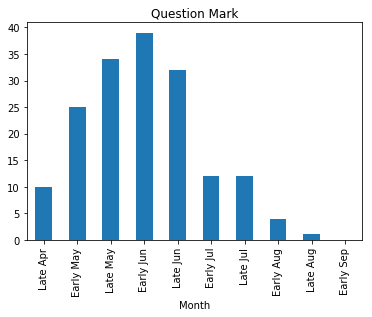

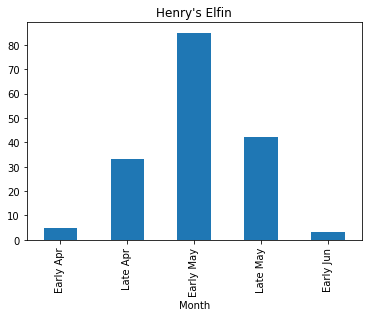

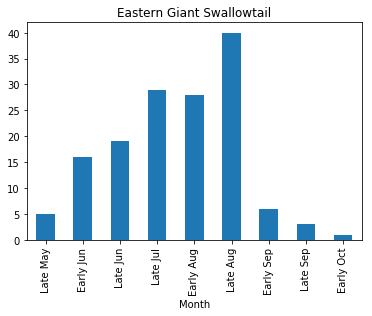

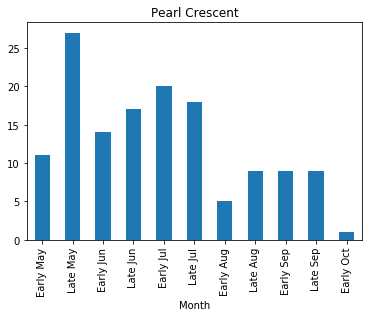

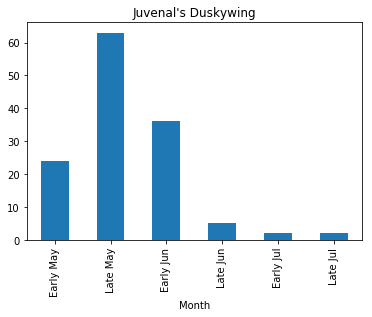

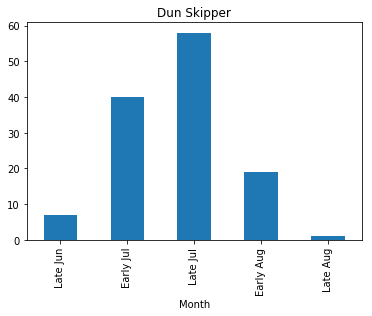

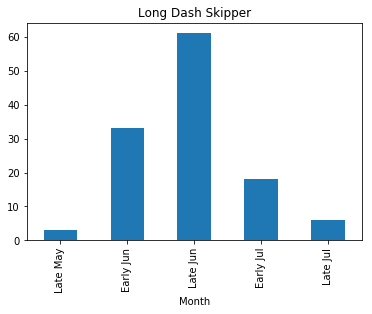

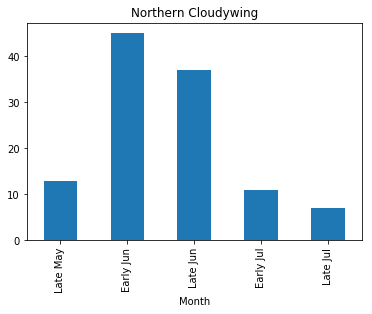

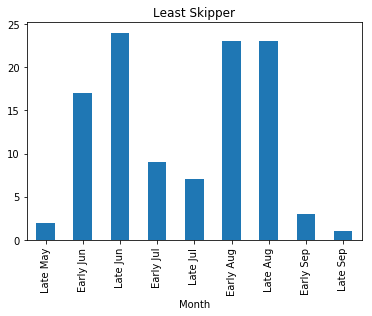

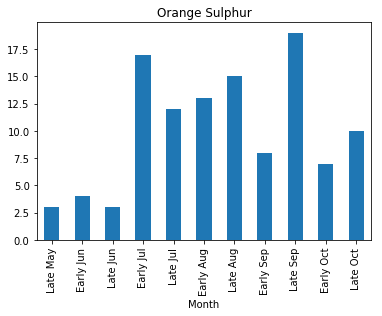

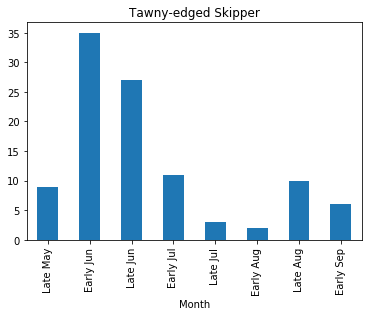

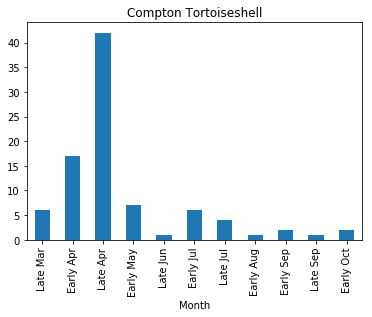

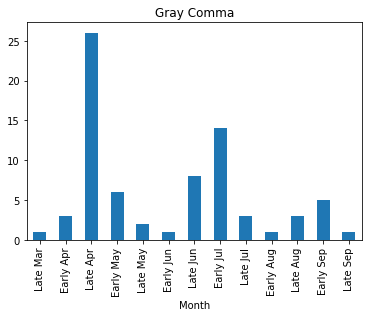

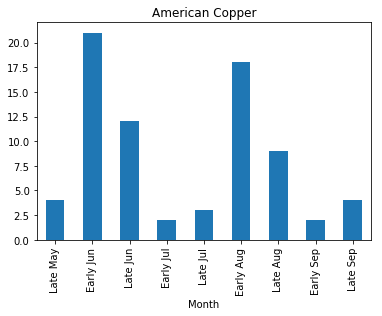

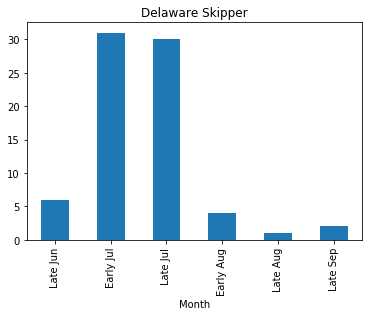

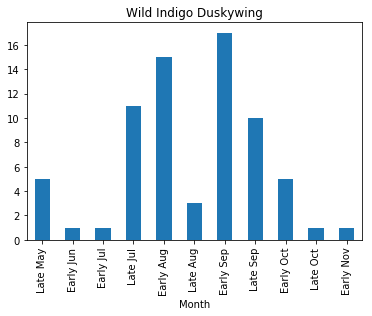

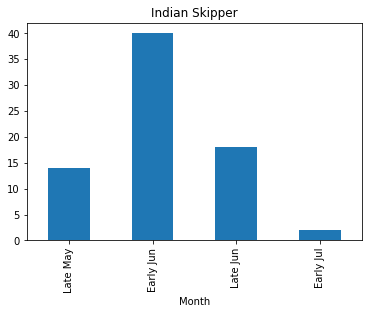

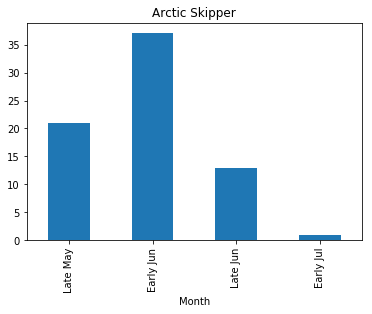

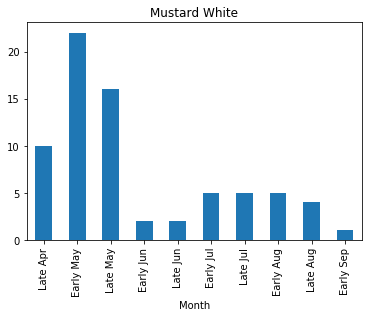

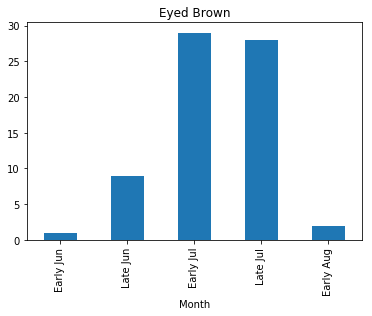

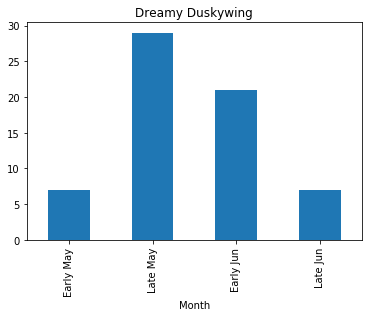

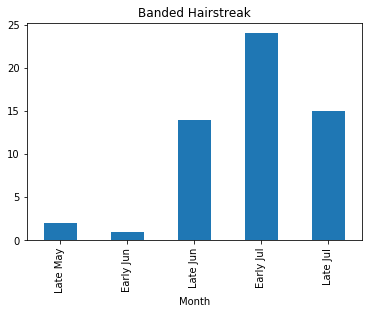

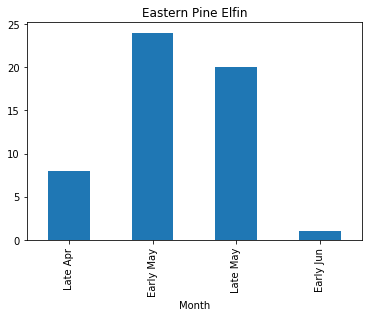

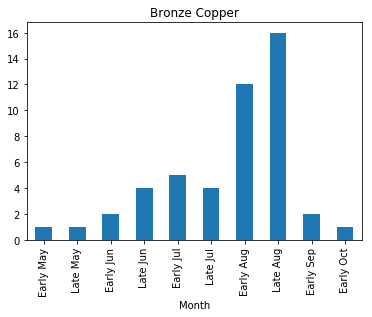

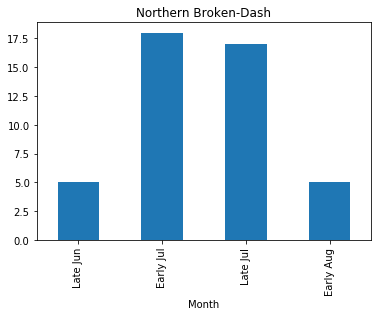

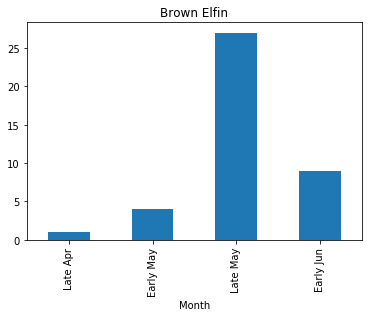

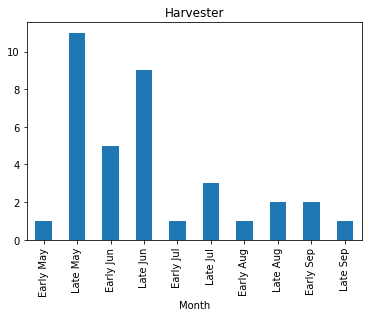

In [13]:
def label(i):
    label = 'Early '
    if i % 2 == 1:
        label = 'Late '
    return label + calendar.month_abbr[int(i/2)]

species = targets.index
for s in species:
    ax = recent[recent['Common Name'] == s].groupby('Extended Month').count()['Count'].plot.bar()
    ax.set_title(s)
    ax.set_xlabel('Month')
    labels = []
    for x in ax.get_xticklabels():
        labels.append(label(int(x.get_text())))
    ax.set_xticklabels(labels)
    plt.show()
None

This gives us the phenology for each species. But we also want to know which species we should be looking for in each
month. Let's restrict our dataset to the target 50 species.

In [14]:
recent = recent[recent['Common Name'].isin(species)]

In [15]:
totals = recent.groupby(['Common Name']).count()['Count']
totals

Common Name
American Copper                 75
American Lady                  170
Arctic Skipper                  72
Banded Hairstreak               56
Black Swallowtail              333
Bronze Copper                   48
Brown Elfin                     41
Cabbage White                 1225
Canadian Tiger Swallowtail     278
Clouded Sulphur               1019
Common Ringlet                 759
Common Wood-Nymph              173
Compton Tortoiseshell           89
Delaware Skipper                74
Dreamy Duskywing                64
Dun Skipper                    125
Eastern Comma                  239
Eastern Giant Swallowtail      147
Eastern Pine Elfin              53
Eastern Tailed Blue            387
European Skipper               341
Eyed Brown                      69
Gray Comma                      74
Great Spangled Fritillary      177
Harvester                       36
Henry's Elfin                  168
Hobomok Skipper                198
Indian Skipper                  74
Juvenal'

In [16]:
count_by_species = {}
for i, x in enumerate(totals.index):
    count_by_species[x] = totals[i]

In [17]:
bymonth = recent.groupby(['Extended Month', 'Common Name']).count()['Count']
bymonth

Extended Month  Common Name              
6               Eastern Comma                  1
7               Compton Tortoiseshell          6
                Eastern Comma                 19
                Gray Comma                     1
                Mourning Cloak                32
8               Cabbage White                  9
                Compton Tortoiseshell         17
                Eastern Comma                 34
                Gray Comma                     3
                Henry's Elfin                  5
                Mourning Cloak                81
                Northern Azure                22
                Red Admiral                    1
9               American Lady                  6
                Black Swallowtail              1
                Brown Elfin                    1
                Cabbage White                 35
                Clouded Sulphur                4
                Common Ringlet                 1
                Compton Tor

Next we want to calculate the percentage of the total observations for each species that occur in each time period. If 15 percent or more of the observations for a species occur in that time period, we display it. The value of 15 percent was determined empirically to make sure that every species is displayed at least once. Happily, this gives us at least once species to look for in each time period from Early April to Late September, the conventional butterfly watching season in Ottawa.

In [18]:
found = set()
for i, x in enumerate(bymonth.index.codes[1]):
    month = bymonth.index.levels[0][bymonth.index.codes[0][i]]
    species = bymonth.index.levels[1][x]
    if species == 'Cabbage White':
        continue
    count = bymonth.values[i]
    percentage = count / count_by_species[species] * 100
    if (percentage >= 10):
        found.add(species)
        print(label(month), species, round(percentage, 2))
set(count_by_species.keys()) - found

Early Apr Compton Tortoiseshell 19.1
Early Apr Eastern Comma 14.23
Early Apr Mourning Cloak 12.64
Late Apr Compton Tortoiseshell 47.19
Late Apr Eastern Comma 23.43
Late Apr Eastern Pine Elfin 15.09
Late Apr Gray Comma 35.14
Late Apr Henry's Elfin 19.64
Late Apr Mourning Cloak 31.2
Late Apr Mustard White 13.89
Late Apr Northern Azure 12.17
Late Apr Red Admiral 22.83
Early May American Lady 17.65
Early May Dreamy Duskywing 10.94
Early May Eastern Comma 12.13
Early May Eastern Pine Elfin 45.28
Early May Henry's Elfin 50.6
Early May Juvenal's Duskywing 18.18
Early May Mourning Cloak 16.85
Early May Mustard White 30.56
Early May Northern Azure 31.94
Early May Question Mark 14.79
Early May Red Admiral 22.42
Late May American Lady 26.47
Late May Arctic Skipper 29.17
Late May Black Swallowtail 18.32
Late May Brown Elfin 65.85
Late May Canadian Tiger Swallowtail 46.4
Late May Dreamy Duskywing 45.31
Late May Eastern Pine Elfin 37.74
Late May Harvester 30.56
Late May Henry's Elfin 25.0
Late May H

{'Cabbage White'}

For the less commonly observed species, a list of previous locations where that species has been sighted would be useful. Of course, this is not necessarily the best place to look, only places where people commonly look for butterflies.

In [ ]:
for s in targets.index:
    if count_by_species[s] > 100:
        continue
    print(s)
    print(recent[recent['Common Name'] == s]['Address'].unique())
    print('---------------')